# Proyecto Final
# Faragó Facundo - Doctorovich Gustavo
# Uiversidad Nacional del Sur

# Importar librerias y dataset

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import WholeBrain.Observables.FC as FC
import WholeBrain.Observables.swFCD as swFCD
import WholeBrain.Observables.phFCD as phFCD
import WholeBrain.Observables.GBC as GBC
import os
from Tests.Deco2018.setup import *


# 
# # Cambio constante de la libreria para que no descarte datos
# phFCD.discardOffset = 0
# 
# # Ruta al archivo de texto con los datos de los sujetos 25x25
# ruta_archivo_25 = 'Datos/Datasets/StructuralConnectivity/netmats2_25.txt'
# 
# # Ruta al archivo de texto con los datos de los sujetos 200x200
# ruta_archivo_200 = 'Datos/Datasets/StructuralConnectivity/netmats2_200.txt'
# 
# # Ruta al archivo de texto con los time series
# ruta_archivo_ts = 'Datos/Datasets/fMRI/100206.txt'
# 
# # Cargar los datos de los sujetos desde los archivos de texto
# datos_sujetos_25 = np.loadtxt(ruta_archivo_25)
# datos_sujetos_200 = np.loadtxt(ruta_archivo_200)
# 
# # Reshape para crear matriz 3D 
# matrices_por_sujeto_25 = datos_sujetos_25.reshape((1003, 25, 25))
# matrices_por_sujeto_200 = datos_sujetos_200.reshape((1003, 200, 200))
# 
# # Calcular la matriz de conectividad promedio de todos los sujetos
# scale = 1
# matriz_conectividad_promedio = np.mean(matrices_por_sujeto_25, axis=0)
# matriz_conectividad_promedio = matriz_conectividad_promedio/matriz_conectividad_promedio.max()
# matriz_conectividad_promedio = matriz_conectividad_promedio*scale
# 
# # Cargar los datos timeseries de los sujetos desde el archivo de texto
# datos_ts = np.loadtxt(ruta_archivo_ts)
# 
# # Reshape para crear una matriz 2D (4800, 25)
# matriz_ts = datos_ts.reshape((4800, 25))
# matriz_ts = matriz_ts[:1200, :]
# matriz_tsT = matriz_ts.T

matriz_ts, matriz_conectividad_promedio,  numSampleSubjects = init()

Going to use a matrix distance measure...
Going to use Functional Connectivity (FC)...
Going to use Sliding Windows Functional Connectivity Dynamics (swFCD)...
Going to use Phase-Interaction Matrix...
Going to use Phase Functional Connectivity Dynamics (phFCD)...
Going to use Global Brain Connectivity (GBC)...
Going to use the Euler-Maruyama Integrator...
Going to use Stephan2008 BOLD model...
Going to use the Balanced J9 (FIC) mechanism...
----------- Processing: EMOTION --------------
Loading Datos/Datasets/DataHCP80/hcp1003_EMOTION_LR_dbs80.mat
reading subject 0
reading subject 1
reading subject 2
reading subject 3
reading subject 4
reading subject 5
reading subject 6
reading subject 7
reading subject 8
reading subject 9
reading subject 10
reading subject 11
reading subject 12
reading subject 13
reading subject 14
reading subject 15
reading subject 16
reading subject 17
reading subject 18
reading subject 19
reading subject 20
reading subject 21
reading subject 22
reading subject 23


# Datos

## Matriz promedio de matrices de conectividad

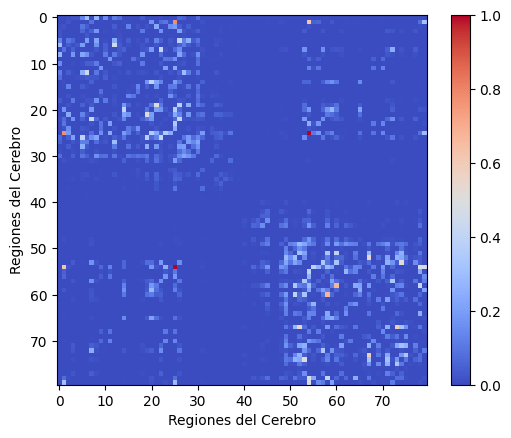

In [3]:
# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## fRMI

In [5]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.coolwarm(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Parcelación {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

AxisError: axis 0 is out of bounds for array of dimension 0

## Correlacion (fMRI)

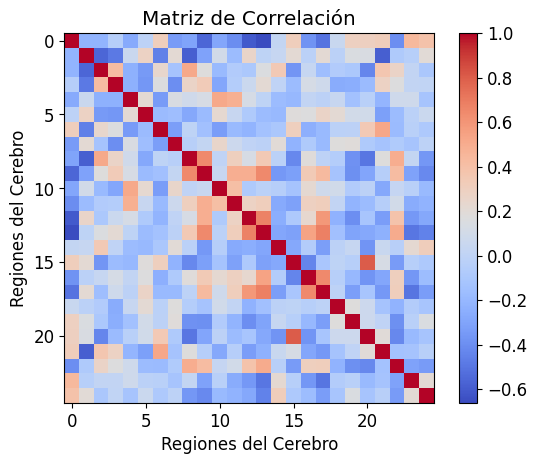

In [7]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()


# Observables

## Functional Connectivity

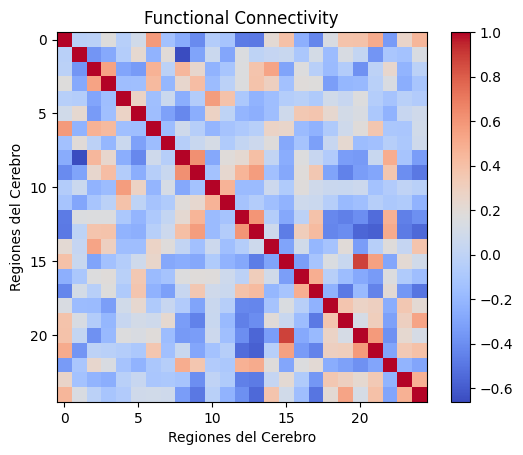

In [31]:
FC_mt = FC.from_fMRI(matriz_tsT, True, True)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(FC_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Functional Connectivity')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## Sliding Window FCD


In [ ]:
sw_FCD = swFCD.from_fMRI(matriz_tsT,True,True)
sw_FCD_mt = swFCD.buildFullMatrix(sw_FCD)  

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(sw_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Sliding Window FCD')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show() 

## Phase Interaction Matrix

In [4]:
ph_FCD = phFCD.from_fMRI(matriz_tsT,True,True)
ph_FCD_mt = phFCD.buildFullMatrix(ph_FCD)             

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(ph_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Phase Interaction Matrix')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show()   

## Global Brain Connectivity

In [ ]:
FCD_mt = GBC.from_fMRI(matriz_tsT,True,True)
GBC_mt = GBC.postprocess(FCD_mt) 

In [ ]:
# Reformatear el vector a una matriz de una columna (25x1)
matriz = GBC_mt.reshape((25, 1))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Mostrar la matriz como imagen
im = ax.imshow(matriz, cmap='coolwarm', aspect='auto', extent=[0, 1, 0, 25])

# Añadir una barra de color
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Valor')

# Ajustar las etiquetas del eje x
ax.set_xticks([])  # Desactivar las etiquetas del eje x

# Añadir etiquetas y título
plt.ylabel('Regiones del Cerebro')
plt.title('Global Brain Connectivity')

# Mostrar la visualización
plt.show()

# Resultados

## Figura Large-scale network

### Deco

=    simulating E-E (no FIC)         =
Processing: 0.0 => 3.106138260020942
Processing: 0.2 => 3.6968087195714565
Processing: 0.4 => 4.701515819088213
Processing: 0.6000000000000001 => 6.274145951203809
Processing: 0.8 => 8.674501460063109
Processing: 1.0 => 12.350690783524929
Processing: 1.2000000000000002 => 16.79365072350723
Processing: 1.4000000000000001 => 21.913998693005734
Processing: 1.6 => 27.31949993745559
Processing: 1.8 => 32.77366135012965
Processing: 2.0 => 38.16528546201515
Processing: 2.2 => 43.605225024714144
Processing: 2.4000000000000004 => 48.96769744914334
Processing: 2.6 => 54.37343738246274
Processing: 2.8000000000000003 => 59.71599023933208
Processing: 3.0 => 65.08901471405703
Processing: 3.2 => 70.38728585614307
Processing: 3.4000000000000004 => 75.71364779830934
Processing: 3.6 => 81.05924001877574
Processing: 3.8000000000000003 => 86.33584905191724
Processing: 4.0 => 91.6676626253406
Processing: 4.2 => 97.0043566201752
Processing: 4.4 => 102.40334987134315
Pr

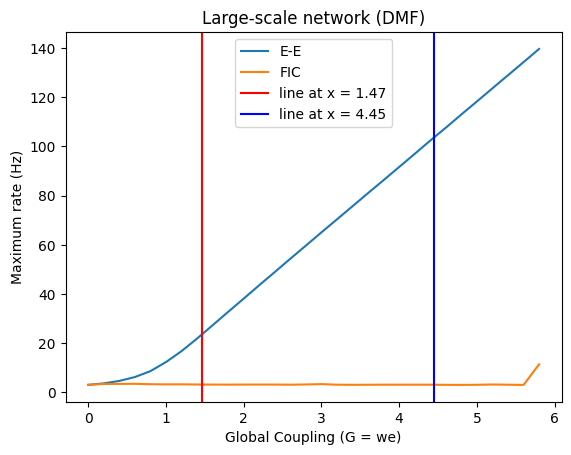

In [15]:
import Tests.DecoEtAl2014.fig2 as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_Deco'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), wStep=0.2, wEnd= 5.8 + 0.001)

### Herzog

In [ ]:
import Tests.fig_Herzog as fig_Herzog

# Carpeta destino
folder_path = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), wStep=0.2, wEnd= 6 + 0.001)

### Naskar

#### Datos Naskar

In [ ]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

# fig_Naskar.integrator.clamping = True
# fig_Naskar.integrator.clamping_max = 2

# Cargo SC
SC = sio.loadmat('Datos/Datasets/StructuralConnectivity/avgSC68.mat')

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(SC['avgSC40'], fileName=os.path.join(folder_path, 'results_{}.txt'), wEnd=1.5, wStep=0.2)

#### Nuevos datos (80x80)

##### DecoEtAl_2014

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
=    simulating Naskar               =

Processing: 0.0  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.008759407833943

Processing: 0.2  maxRateFIC => 3.0087590753355054

Processing: 0.4  maxRateFIC => 3.0091590157289168

Processing: 0.6000000000000001  maxRateFIC => 3.0145647322871816

Processing: 0.8  maxRateFIC => 3.0087577817020774

Processing: 1.0  maxRateFIC => 3.0088018140835104

Processing: 1.2000000000000002  maxRateFIC => 3.0088948248032463

Processing: 1.4000000000000001  maxRateFIC => 3.0087840802342267

Processing: 1.6  maxRateFIC => 3.0087923506909195

Processing: 1.8  maxRateFIC => 3.0088332423210082

Processing: 2.0  maxRateFIC => 3.009813806028312

Processing: 2.2  maxRateFIC => 3.0088475885302928

Processing: 2.4000000000000004  maxRateFIC => 3.0088595065826653

Processing: 2.6  maxRateFIC => 3.009051713724801

Processing: 2.8000000000000003  maxRateFIC => 3.0089283116261925

Processing: 3.0  maxRateFIC => 3.0088336679435232

Processing: 3.2  maxRateFIC => 3.0088464025610433

Processing: 3.4000000000000004  maxRateFIC => 3.0113795996114288

Processing: 

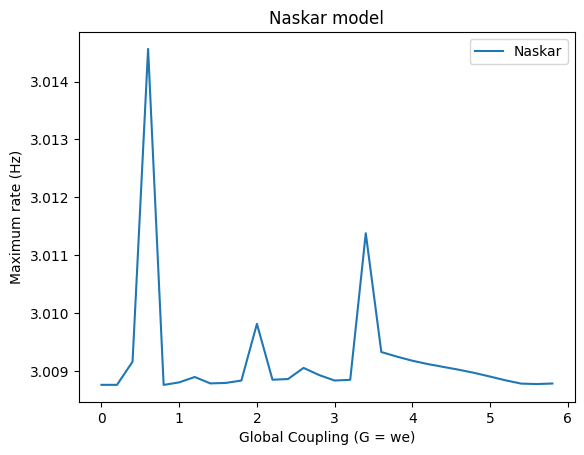

In [4]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

inFilePath = 'Datos/Datasets/DataHCP80/'
outFilePath = 'Datos/Results/Results_80x80/'

SC_path = inFilePath + 'SC_dbs80HARDIFULL.mat'
sc80 = sio.loadmat(SC_path)['SC_dbs80FULL']
C = sc80/np.max(sc80)  # Normalization...

fig_Naskar.plotMaxFrecForAllWe(C, fileName=os.path.join(outFilePath , 'results_{}.txt'), wEnd=6, wStep=0.2)    

##### NaskarEtAl_2018

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
=    simulating Naskar               =

Processing: 0.0  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.161333469496898

Processing: 0.2  maxRateFIC => 3.0945247769440276

Processing: 0.4  maxRateFIC => 3.072453409556735

Processing: 0.6000000000000001  maxRateFIC => 3.1256443713821236

Processing: 0.8  maxRateFIC => 12.373060708261026

Processing: 1.0  maxRateFIC => 19.592761277742767

Processing: 1.2000000000000002  maxRateFIC => 24.96205176862937

Processing: 1.4000000000000001  maxRateFIC => 30.40715990878755


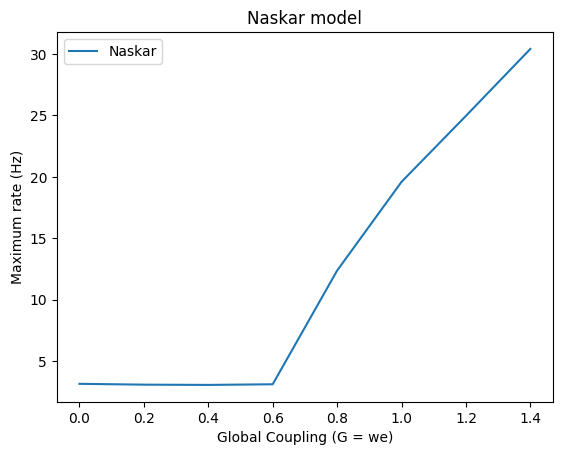

In [3]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

inFilePath = 'Datos/Datasets/DataHCP80/'
outFilePath = 'Datos/Results/Results_80x80/'

SC_path = inFilePath + 'SC_dbs80HARDIFULL.mat'
sc80 = sio.loadmat(SC_path)['SC_dbs80FULL']
C = sc80/np.max(sc80)  # Normalization...

fig_Naskar.plotMaxFrecForAllWe(C, fileName=os.path.join(outFilePath , 'results_{}.txt'), wEnd=1.4+0.001, wStep=0.1)    

### Naskar - Deco - Herzog

In [ ]:
import Tests.fig_NDH as fig_NDH

# Carpeta destino
folder_path_h = 'Datos/Results/Results_Herzog'
folder_path_d = 'Datos/Results/Results_Deco'

# Calculo DMF
fig_NDH.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName_H=os.path.join(folder_path_h, 'results_{}.txt'), fileName_D=os.path.join(folder_path_d, 'results_{}.txt'),wStep=0.2 ,wEnd = 0.4+0.01)

plt.show()

=    simulating Naskar               =

Processing: 0.2  maxRateFIC => 3.0087590753355054

Processing: 0.4  

## Optimizacion de variables

### G optimo

In [ ]:
import Tests.Deco2018.prepro as prepro
#import WholeBrain.Utils.FIC.Balance_Herzog2022 as Balance_Herzog2022
#import WholeBrain.Utils.FIC.Balance_DecoEtAl2014 as Balance_DecoEtAl2014
#import WholeBrain.Models.DynamicMeanField as DMF
import WholeBrain.Models.Naskar as Naskar

outFilePath = 'Datos/Results/Results_80x80/'
inFilePath = 'Datos/Datasets/DataHCP80/'
prepro.scale = 1
#prepro.outFilePath = outFilePath 
#prepro.inFilePath = inFilePath
#prepro.BalanceFIC.balancingMechanism = Balance_Herzog2022 


J_fileNames = outFilePath + "results_{}.txt"
prepro.prepro_Optim(neuronalModel= Naskar, M_e_optim= 1, M_i_optim= 1, J_fileNames= J_fileNames, End=6, Start=0)

In [ ]:
import Tests.Deco2018.plot as fig_optim
fig_optim.plot_optim('Datos/Results/Results_80x80/DecoEtAl2018_fneuro.mat', x= 'G')

### M_e Optimo

In [ ]:
import Tests.Deco2018.prepro as prepro
#import WholeBrain.Utils.FIC.Balance_Herzog2022 as Balance_Herzog2022
#import WholeBrain.Utils.FIC.Balance_DecoEtAl2014 as Balance_DecoEtAl2014
#import WholeBrain.Models.DynamicMeanField as DMF
import WholeBrain.Models.Naskar as Naskar

outFilePath = 'Datos/Results/Results_test/'
inFilePath = 'Datos/Datasets'
prepro.scale = 1
prepro.outFilePath = outFilePath 
prepro.inFilePath = inFilePath
#prepro.BalanceFIC.balancingMechanism = Balance_Herzog2022 


J_fileNames = outFilePath + "results_{}.txt"
prepro.prepro_Optim(neuronalModel= Naskar, selectedTask= 'GAMBLING', G_optim=6, J_fileNames=J_fileNames)

In [ ]:
import Tests.Deco2018.plot as fig_optim
fig_optim.plot_optim('Datos/Results/Results_Test/DecoEtAl2018_fneuro.mat', x= 'M_e')

### Guardar vector de J

In [2]:
prepro.save_J(M_e_optim=1, G_optim=6)

Going to use the Dynamic Mean Field (DMF) neuronal model...
Loading Datos/Datasets/StructuralConnectivity/netmats2_25.txt
Loading Datos/Datasets/fMRI/...
matriz_tridimensional is (25, 1200) and each entry has N=25 regions and Tmax=4800
Simulating 1 subjects!


Recompiling signatures!!!
Saving J...


D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\EulerMaruyama.py:36: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


DONE!!! (file: Datos/Results/Results_test/J_Optim.mat)
